## Simple Perceptrons

Below we define code for a simple perceptron, which consists of a single output node and $k+1$ inputs ($k$ inputs plus a bias signal which is always +1). The perceptron can be used for binary classification of linearly separable classes. 

The raw output of the network is the simple weighted sum of the inputs. That is, if an instance has inputs $x_1$, $\ldots$, $x_k$ inputs, and the perceptron defines weights $\theta_0$, $\ldots$, $\theta_k$, then the output is

$y = \displaystyle\sum_{j=0}^{k}\theta_j x_j$.

Here, $x_0 = 1$ is the bias. From the raw output, a class $h_\theta(x)$ can be derived. If the output is $>0$, then the class is said to be *positive* (+1). If the output is $\leq 0$, the class is *negative* (-1). 

Training a perceptron is iterative. Simply put, for each instance $i$ that the perceptron gets wrong, we adjust the weights: For each weight $\theta_j$, if the actual class of instance $i$ is positive, we simply add $x_j^{(i)}$ to $\theta_j$. If instead the instance is negative, we subtract $x_j^{(i)}$ from $\theta_j$. 

That is, if instance $i$ is incorrectly classified, then $\theta_j$' is $\theta_j + h_\theta(x^{(i)}) x_j^{(i)}$, where $h_\theta(x^{(i)})$ is either +1 or -1. 

This continues until all instances are correctly classified. Somewhat surprisingly, provided the two classes are linearly separable, this simple scheme will find a hyperplane separating them. 

## Defining a data set

We first define a few clusters of data points, which we plot.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cluster(n, mean_x = 0, std_x = 1, mean_y = 0, std_y = 1):
    x = np.random.normal(loc = mean_x,scale=std_x, size=n)
    y = np.random.normal(loc = mean_y,scale=std_y, size=n)
    df = pd.DataFrame([x,y]).T
    df.columns = ['X','Y']
    return df

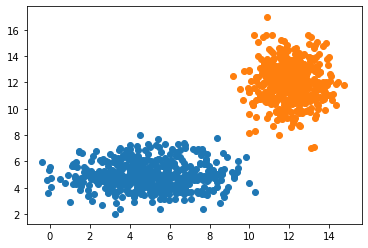

In [2]:
cluster1 = cluster(500,mean_x=5,std_x=2, mean_y=5, std_y=1)
cluster1['Target'] = -1
cluster2 = cluster(500,mean_x=12,std_x=1, mean_y=12, std_y=1.5)
cluster2['Target'] = 1
data = pd.concat([cluster1,cluster2])

plt.scatter(cluster1['X'],cluster1['Y'])
plt.scatter(cluster2['X'],cluster2['Y'])


We separate the inputs from the targets

In [3]:
# copy the data set
working = data.copy()

# separate inputs and target values
targets = working.Target.values
inputs = working[['X','Y']].values


## Perceptron learning function

We then define a function to learn the weights for the perceptron.

In [4]:
def perceptron(inputs, targets, max_iter = 1000):
    """Given a data set of inputs and targets (for classes -1, +1), 
    learn weights for the hyperplace separating them. 
    """
    
    # get the number of rows and columns in the inputs
    (rows, cols) = inputs.shape;
    
    # initialize the weights to 0
    weights = np.zeros(cols+1)
   
    # add a column of 1s to the inputs for the bias. 
    instances = np.hstack((np.ones((rows,1)), inputs[:,:]))

    
    # the main learning loop
    for j in range(max_iter):
        predicted = instances.dot(weights)
        
        # stop if no misclassifications are made
        found_incorrect = False
        
        for i in range(rows):
            if targets[i]> 0 and predicted[i] <= 0:
                found_incorrect = True
                weights = weights + instances[i]
            elif targets[i] <= 0 and predicted[i] > 0:
                found_incorrect = True
                weights = weights - instances[i]        
        if not found_incorrect:
            break
    return weights

def classify(inputs, weights):
    """return raw outputs for each instance in inputs, based on
    the current value of the weights. 
    """
    (rows, cols) = inputs.shape;
    instances = np.hstack((np.ones((rows,1)), inputs[:,:]))
    return instances.dot(weights)

# line: ax + by + c = 0
# y = (-c -ax)/b
def myline(x,c,a,b):
    """compute a value for y from x,c,a,b"""
    return (-c - a*x)/b

def count_wrong(targets, predicted):
    """Count the number of insances the perceptron got wrong"""
    return np.sum((targets > 0) == (predicted <= 0))

## Training on the data

Now we learn the weights for the data set we have created. 

In [5]:
weights = perceptron(inputs, targets)
predicted = classify(inputs, weights)
print(count_wrong(targets, predicted))

0


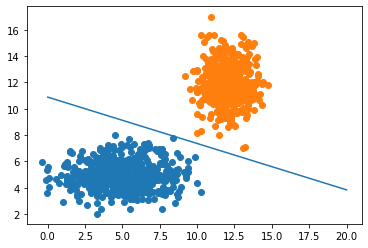

In [6]:
ls = np.linspace(0, 20, 500)
plt.scatter(cluster1['X'],cluster1['Y'])
plt.scatter(cluster2['X'],cluster2['Y'])
plt.plot(ls,myline(ls,weights[0],weights[1], weights[2]))
plt.show()